In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam

In [11]:
dt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AirPassengers.csv')
dt.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
df = dt.iloc[:,1].values

In [13]:
df = df.reshape(-1,1)
df = df.astype('float')

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
sc = MinMaxScaler(feature_range=(0,1))
df1 = sc.fit_transform(df)

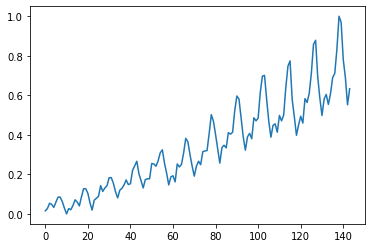

In [16]:
plt.plot(df1)

In [17]:
l = len(df1)
train = df1[0:int(0.6*l)]
test = df1[int(0.6*l):l]

In [18]:
T = 12
trainX = []
trainY = []
for t in range(len(train)-T-1):
  x = train[t:t+T,0]
  trainX.append(x)
  y = train[t+T,0]
  trainY.append(y)
trainX = np.array(trainX).reshape(-1,T,1)
trainY = np.array(trainY)

In [19]:
testX = []
testY = []
for t in range(len(test)-T-1):
  x = test[t:t+T,0]
  testX.append(x)
  y = test[t+T,0]
  testY.append(y)
testX = np.array(testX).reshape(-1,T,1)
testY = np.array(testY)  

In [20]:
from tensorflow.keras.layers import Dropout

In [21]:
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 100,activation='relu', return_sequences = True, input_shape = (trainX.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 80,activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 30,activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fifth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 20))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
r = regressor.fit(trainX, trainY, epochs = 250, batch_size = 50, validation_data = (testX,testY))

Epoch 1/250
2/2 [==============================] - 4s 629ms/step - loss: 0.3187 - val_loss: 0.3724
Epoch 2/250
2/2 [==============================] - 0s 50ms/step - loss: 0.0543 - val_loss: 0.1646
Epoch 3/250
2/2 [==============================] - 0s 42ms/step - loss: 0.0269 - val_loss: 0.1043
Epoch 4/250
2/2 [==============================] - 0s 44ms/step - loss: 0.0192 - val_loss: 0.0746
Epoch 5/250
2/2 [==============================] - 0s 45ms/step - loss: 0.0185 - val_loss: 0.0676
Epoch 6/250
2/2 [==============================] - 0s 40ms/step - loss: 0.0146 - val_loss: 0.0721
Epoch 7/250
2/2 [==============================] - 0s 42ms/step - loss: 0.0123 - val_loss: 0.0797
Epoch 8/250
2/2 [==============================] - 0s 42ms/step - loss: 0.0124 - val_loss: 0.0858
Epoch 9/250
2/2 [==============================] - 0s 42ms/step - loss: 0.0112 - val_loss: 0.0861
Epoch 10/250
2/2 [==============================] - 0s 47ms/step - loss: 0.0100 - val_loss: 0.0817
Epoch 11/250
2/2 [

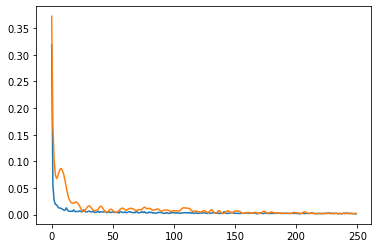

In [22]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
pred = regressor.predict(trainX)

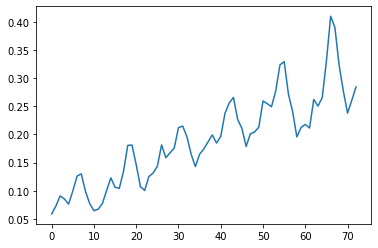

In [25]:
plt.plot(pred)

In [26]:
prd_test = regressor.predict(testX)

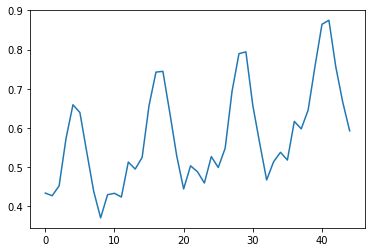

In [27]:
plt.plot(prd_test)

In [28]:
predplot = np.empty_like(df1)
predplot[:,:] = np.nan
predplot[T:len(trainX)+T,:] = sc.inverse_transform(pred)
pred_test = np.empty_like(df1)
pred_test[:,:] = np.nan
pred_test[len(pred)+2*T+1:len(df1)-1,:] = sc.inverse_transform(prd_test)
dff = sc.inverse_transform(df1)

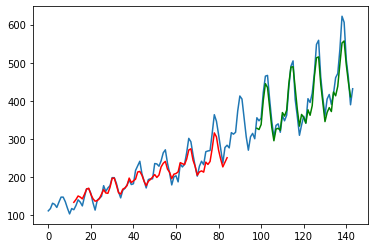

In [29]:
plt.plot(dff)
plt.plot(predplot, c='r')
plt.plot(pred_test, c='g')

In [30]:
from tensorflow.keras.layers import LSTM

In [31]:
model = Sequential()
model.add(LSTM(4,input_shape = (trainX.shape[1],1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
ls = model.fit(trainX,trainY, epochs=300, batch_size=1, verbose=2, validation_data=(testX,testY))

Epoch 1/300
73/73 - 0s - loss: 0.0017 - val_loss: 0.0194 - 334ms/epoch - 5ms/step
Epoch 2/300
73/73 - 0s - loss: 0.0017 - val_loss: 0.0216 - 435ms/epoch - 6ms/step
Epoch 3/300
73/73 - 0s - loss: 0.0018 - val_loss: 0.0267 - 455ms/epoch - 6ms/step
Epoch 4/300
73/73 - 0s - loss: 0.0018 - val_loss: 0.0185 - 462ms/epoch - 6ms/step
Epoch 5/300
73/73 - 0s - loss: 0.0017 - val_loss: 0.0210 - 484ms/epoch - 7ms/step
Epoch 6/300
73/73 - 0s - loss: 0.0017 - val_loss: 0.0230 - 449ms/epoch - 6ms/step
Epoch 7/300
73/73 - 0s - loss: 0.0018 - val_loss: 0.0163 - 461ms/epoch - 6ms/step
Epoch 8/300
73/73 - 0s - loss: 0.0017 - val_loss: 0.0226 - 487ms/epoch - 7ms/step
Epoch 9/300
73/73 - 0s - loss: 0.0016 - val_loss: 0.0182 - 498ms/epoch - 7ms/step
Epoch 10/300
73/73 - 0s - loss: 0.0017 - val_loss: 0.0180 - 499ms/epoch - 7ms/step
Epoch 11/300
73/73 - 0s - loss: 0.0016 - val_loss: 0.0169 - 442ms/epoch - 6ms/step
Epoch 12/300
73/73 - 0s - loss: 0.0017 - val_loss: 0.0199 - 424ms/epoch - 6ms/step
Epoch 13/300


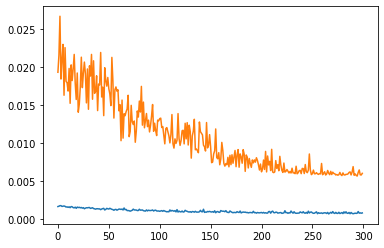

In [33]:
plt.plot(ls.history['loss'])
plt.plot(ls.history['val_loss'])

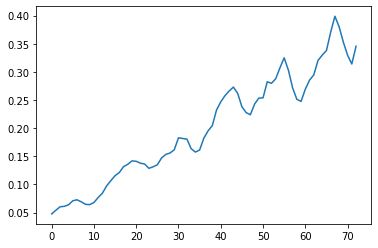

In [34]:
p_train = model.predict(trainX)
plt.plot(p_train)

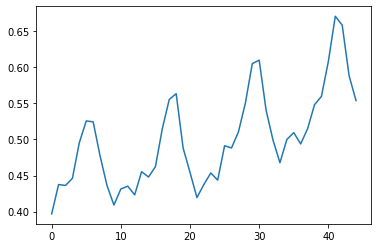

In [35]:
p_test = model.predict(testX)
plt.plot(p_test)

In [37]:
predplotlstm = np.empty_like(df1)
predplotlstm[:,:] = np.nan
predplotlstm[T:len(trainX)+T,:] = sc.inverse_transform(pred)
pred_testlstm = np.empty_like(df1)
pred_testlstm[:,:] = np.nan
pred_testlstm[len(pred)+2*T+1:len(df1)-1,:] = sc.inverse_transform(p_test)
dff = sc.inverse_transform(df1)

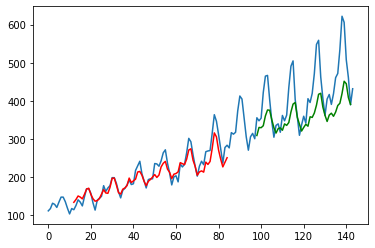

In [38]:
plt.plot(dff)
plt.plot(predplotlstm, c='r')
plt.plot(pred_testlstm, c='g')